In [38]:
# 1. 라이브러리 불러오기

# pandas / numpy → 데이터 다루기
# matplotlib / seaborn → 데이터 시각화
# sklearn → 데이터 분할(train/test), 전처리(Label 인코딩, 스케일링)
# tensorflow.keras → 딥러닝 모델 만들기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout




In [40]:
# 2. 데이터 불러오기

file_path = "/content/drive/MyDrive/Colab Notebooks/winequality-white.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path, sep=';')

print(df.head())
print(df.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [41]:

# 3. Feature / Label 분리
label_col = "quality"
X = df.drop(columns=[label_col])
y = df[label_col]

# 4. Label 인코딩 (B=0, M=1)
le = LabelEncoder()
y = le.fit_transform(y)   # (0/1 로 변환)

# 5. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [42]:
# 결측치 확인
df.isnull().sum()

#결측치가 있다면 제거
#df = df.dropna()
#df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [44]:
# 레이블 확인
df['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


In [53]:
# 6. 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. 모델 구성 (FC Layer만 사용)
# 이진 분류가 아닌 다중 분류라서 Dense(클래스수), softmax 사용

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # 클래스 개수=7


# 8. 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
# 9. 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3200 - loss: 1.7198 - val_accuracy: 0.4962 - val_loss: 1.2688
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4847 - loss: 1.3153 - val_accuracy: 0.5204 - val_loss: 1.1793
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5032 - loss: 1.2119 - val_accuracy: 0.5217 - val_loss: 1.1449
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5080 - loss: 1.1830 - val_accuracy: 0.5395 - val_loss: 1.1265
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5193 - loss: 1.1502 - val_accuracy: 0.5408 - val_loss: 1.1145
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5132 - loss: 1.1485 - val_accuracy: 0.5242 - val_loss: 1.1119
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5424 - loss: 1.1101 - val_accuracy: 0.5268 - val_loss: 1.1053
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5215 - loss: 1.1509 - val_accuracy: 0.5332 - val_loss

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.06      0.10        33
           2       0.57      0.61      0.59       291
           3       0.56      0.69      0.62       440
           4       0.54      0.37      0.44       176
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00         1

    accuracy                           0.56       980
   macro avg       0.29      0.25      0.25       980
weighted avg       0.53      0.56      0.53       980

Confusion Matrix:
[[  0   0   2   2   0   0   0]
 [  0   2  24   7   0   0   0]
 [  0   2 177 108   4   0   0]
 [  0   2  99 303  36   0   0]
 [  0   0   5 106  65   0   0]
 [  0   0   1  19  15   0   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Test Accuracy: 0.5582


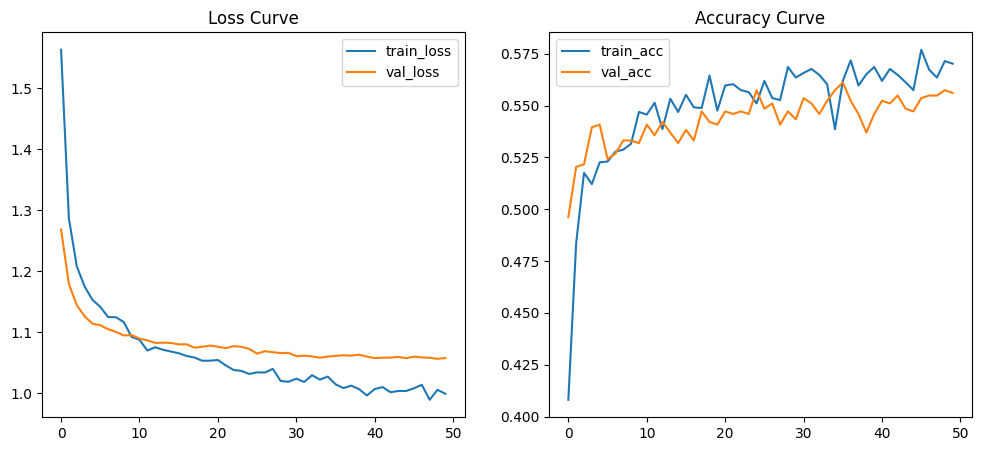

In [56]:
# 10. 평가
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc:.4f}")

# 11. 학습 곡선 시각화
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

In [49]:
print(df['quality'].value_counts())


quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64
